# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
current_data_btc = requests.get(btc_url)
current_data_btc
current_content_btc = current_data_btc.content
current_content_btc
data_btc = current_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
# Fetch current ETH price
current_data_eth = requests.get(eth_url)
current_content_eth = current_data_eth.content
data_eth = current_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19021893,
            "total_supply": 19021893,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 39215.0,
                    "volume_24h": 27051595731,
                    "market_cap": 746145563565,
                    "percentage_change_1h": 0.726377816297387,
                    "percentage_change_24h": -1.62844692226381,
                    "percentage_change_7d": -1.31969435002122,
                    "percent_change_1h": 0.726377816297387,
                    "percent_change_24h": -1.62844692226381,
                    "percent_change_7d": -1.31969435002122
                },
                "CAD": {
                    "price": 50042.2615,
                    "volume_24h": 34520541312.3291,
                   

In [6]:
# Compute current value of my crpto
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47058.00
The current value of your 5.3 ETH is $15310.43


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2022-04-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars( tickers, timeframe, start=today, end=today,).df
df_portfolio.index = df_portfolio.index.date
df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
2022-04-21,103.44,103.47,102.79,103.04,11393860,35595,103.047589,AGG
2022-04-21,448.58,450.01,437.10,438.06,85097110,719682,442.772969,SPY


In [10]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
df_ticker.head()

AGG                                                            \
              open    high     low   close    volume trade_count        vwap   
2022-04-21  103.44  103.47  102.79  103.04  11393860       35595  103.047589   

               SPY                                                           
              open    high    low   close    volume trade_count        vwap  
2022-04-21  448.58  450.01  437.1  438.06  85097110      719682  442.772969

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $103.04
Current SPY closing price: $438.06


In [12]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21903.00
The current value of your 200 AGG shares is $20608.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000


# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value

# Create savings DataFrame
data = {'amount':[total_crypto, total_shares_value]} 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,62368.428
shares,42511.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

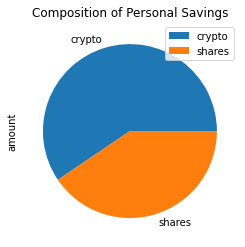

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value
total_savings
# Validate saving health
if total_savings > emergency_fund:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")
              

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [17]:

# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df
df_stock_data.index = df_stock_data.index.date
# Reorganize the DataFrame
# Separate ticker data

AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)



# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])


# Display sample data
df_stock_data.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                           SPY                                                 \
                  vwap    open    high     low   close     volume trade_count   
2016-05-02  110.627199  206.90  208.18  206.41  208.03   61908515      263580   
2016-05-03  110.865995  206.50  206.80  205.28  206.13  106422142      377518   
2016-05-04  110.879063  205.00  205.85  204.42  204.96   92199810      345261   
2016-05-05  111.028363  205.57  205.98  204.47  204.95   67597222      280622   
2016-05-06  111.031967  204.04  205.77  203.88  205.70   89131004      340335   

                        
                  vwap  
2016-05-02  207.294812  
2016-05-03  206.312060  
2016-05-04  205.090172  
2016-05-05  205.141555  
2016-05-06  204.937074

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_distribution = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [19]:
# Printing the simulation input data
MC_even_distribution.portfolio_data.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                                        SPY                          \
                  vwap daily_return    open    high     low   close   
2016-05-02  110.627199          NaN  206.90  208.18  206.41  208.03   
2016-05-03  110.865995     0.001808  206.50  206.80  205.28  206.13   
2016-05-04  110.879063     0.000451  205.00  205.85  204.42  204.96   
2016-05-05  111.028363     0.002526  205.57  205.98  204.47  204.95   
2016-05-06  111.031967    -0.001530  204.04  205.77  203.88  205.70   

                                                            
               volume trade_count        vwap daily_return  
2016-05-02   61908515      263580  207.294812          NaN  
2016-05-03  106422142      377518  206.312060    -0.009133  
2016-05-04   92199810      345261  205.090172    -0.005676  
2016-05-05   67597222      280622  205.141555    -0.000049  
2016-05-06   89131004      340335  204.937074     0.003659

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_distribution.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Joanne M\Downloads\FINTECH\USYD-VIRT-FIN-PT-03-2022-U-LOL\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993859,0.995866,1.009309,1.004197,1.009861,1.013263,1.002050,1.003831,0.996622,1.005246,...,0.997983,0.985125,1.001086,0.997049,1.005226,1.000183,0.991709,1.006053,1.012269,0.986083
2,1.006152,0.995206,1.013313,0.992846,1.008859,1.005502,1.002276,0.996302,1.008032,1.004213,...,1.002848,0.968420,0.995975,1.012030,1.003404,1.001816,0.994693,1.001850,1.012670,0.982536
3,1.014050,0.989955,1.021122,0.997025,1.012189,1.008243,1.013847,0.995678,1.009770,1.008472,...,1.010345,0.977923,0.989124,1.036280,0.997807,0.998634,1.006092,1.010330,1.023478,0.981550
4,1.005399,0.992796,1.010515,0.988943,1.013348,1.013185,1.010469,0.990126,1.007314,1.020438,...,1.007837,0.985307,0.990014,1.044234,0.993048,1.006642,1.001674,1.008255,1.022793,0.986501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.138687,12.618190,12.016149,53.818959,31.669715,49.800524,14.264024,3.212238,15.289625,42.621572,...,20.178760,12.098167,26.258491,13.242849,19.510641,56.951058,21.165177,7.514204,30.657904,10.893695
7557,12.071004,12.692952,12.053986,53.932100,31.622098,50.182577,14.269443,3.209819,15.345984,42.963799,...,20.089303,11.968593,26.718858,13.323469,19.405513,57.075116,21.068805,7.586666,30.401064,10.717857
7558,12.080227,12.545961,12.096953,53.700161,31.530323,50.364084,14.270769,3.201619,15.380973,42.869782,...,20.202801,12.034987,26.553942,13.327739,19.514996,57.536233,20.782971,7.573503,30.230668,10.797082
7559,11.995709,12.526212,11.998819,53.672195,31.340450,50.113869,14.318125,3.209366,15.292131,43.100730,...,20.266634,11.980866,26.521745,13.473950,19.226545,57.060079,20.920395,7.659829,30.445935,10.727907


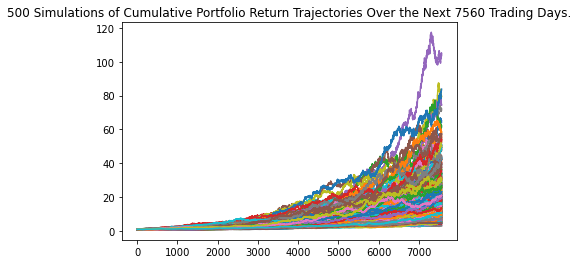

In [21]:
# Plot simulation outcomes

line_plot = MC_even_distribution.plot_simulation()


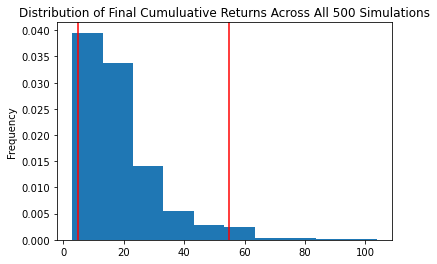

In [22]:
# Plot probability distribution and confidence intervals

dist_plot = MC_even_distribution.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
even_table = MC_even_distribution.summarize_cumulative_return()

# Print summary statistics
print(even_table)

count           500.000000
mean             19.364530
std              13.415507
min               3.008060
25%              10.465153
50%              15.286402
75%              24.361712
max             103.663306
95% CI Lower      5.042184
95% CI Upper     54.929808
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_table[8]*20000,2)
ci_upper = round(even_table[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $100843.68 and $1098596.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_table[8]*30000,2)
ci_upper = round(even_table[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $151265.52 and $1647894.25


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_five.portfolio_data.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                                        SPY                          \
                  vwap daily_return    open    high     low   close   
2016-05-02  110.627199          NaN  206.90  208.18  206.41  208.03   
2016-05-03  110.865995     0.001808  206.50  206.80  205.28  206.13   
2016-05-04  110.879063     0.000451  205.00  205.85  204.42  204.96   
2016-05-05  111.028363     0.002526  205.57  205.98  204.47  204.95   
2016-05-06  111.031967    -0.001530  204.04  205.77  203.88  205.70   

                                                            
               volume trade_count        vwap daily_return  
2016-05-02   61908515      263580  207.294812          NaN  
2016-05-03  106422142      377518  206.312060    -0.009133  
2016-05-04   92199810      345261  205.090172    -0.005676  
2016-05-05   67597222      280622  205.141555    -0.000049  
2016-05-06   89131004      340335  204.937074     0.003659

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_even_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Joanne M\Downloads\FINTECH\USYD-VIRT-FIN-PT-03-2022-U-LOL\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004997,1.004508,0.997096,0.985516,1.006739,0.990549,1.005881,0.998230,1.003390,0.996343,...,0.998008,0.995198,1.010423,0.993899,0.993763,1.005124,1.003337,0.991394,0.994510,0.992239
2,1.010694,1.004058,0.989930,0.981023,1.006794,0.993503,1.017652,0.989432,1.005589,0.998211,...,0.990208,1.004749,1.001253,0.999913,0.990429,1.001093,0.997759,0.988510,0.986608,0.993565
3,1.010826,1.002056,0.992759,0.982898,1.008399,0.994944,1.014579,0.976964,0.999022,1.002614,...,0.989158,1.012198,1.007538,0.997406,0.998961,0.996416,1.001579,0.992181,0.988483,0.988434
4,1.008354,0.993668,0.992965,0.985165,1.007678,1.002952,1.017192,0.976426,0.984376,1.004027,...,1.005192,1.009538,1.022272,1.004969,0.992162,1.003554,0.996543,0.991588,0.997481,0.993195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.071174,1.645385,1.355106,1.356549,2.334776,2.291218,1.170062,1.540025,1.241692,2.224718,...,2.114835,1.445201,1.964165,1.345770,1.622980,1.692621,1.612693,1.481621,1.503643,2.159258
1257,2.068151,1.637680,1.364063,1.370960,2.333453,2.280317,1.159723,1.542093,1.247687,2.193907,...,2.096056,1.432682,1.957839,1.334527,1.600701,1.672137,1.611606,1.481886,1.515376,2.152935
1258,2.074360,1.641361,1.364401,1.382465,2.303289,2.293451,1.167995,1.541622,1.244508,2.193478,...,2.100600,1.424512,1.955327,1.315246,1.605204,1.676566,1.614364,1.472656,1.511540,2.144046
1259,2.088145,1.636322,1.372955,1.382963,2.305320,2.295851,1.177999,1.543377,1.243613,2.175543,...,2.103299,1.412836,1.959374,1.298374,1.617797,1.651394,1.622053,1.478835,1.511862,2.143063


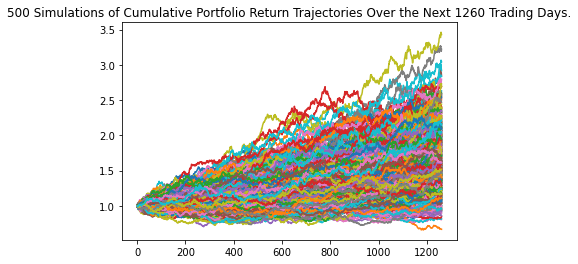

In [32]:
# Plot simulation outcomes

line_plot_five = MC_even_five.plot_simulation()

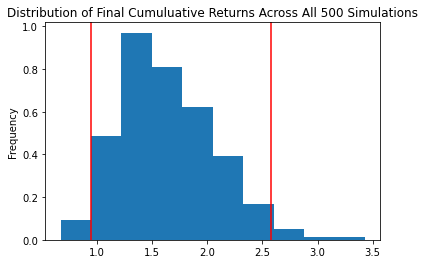

In [33]:
# Plot probability distribution and confidence intervals
ist_plot_five = MC_even_five.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              1.635211
std               0.435202
min               0.667715
25%               1.320667
50%               1.568654
75%               1.918834
max               3.429416
95% CI Lower      0.943580
95% CI Upper      2.579536
Name: 1260, dtype: float64


In [35]:
# Set initial investment
initial_investment_five = 70000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*70000,2)
ci_upper_five = round(even_tbl_five[9]*70000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $66050.58 and $180567.52


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_ten.portfolio_data.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                                        SPY                          \
                  vwap daily_return    open    high     low   close   
2016-05-02  110.627199          NaN  206.90  208.18  206.41  208.03   
2016-05-03  110.865995     0.001808  206.50  206.80  205.28  206.13   
2016-05-04  110.879063     0.000451  205.00  205.85  204.42  204.96   
2016-05-05  111.028363     0.002526  205.57  205.98  204.47  204.95   
2016-05-06  111.031967    -0.001530  204.04  205.77  203.88  205.70   

                                                            
               volume trade_count        vwap daily_return  
2016-05-02   61908515      263580  207.294812          NaN  
2016-05-03  106422142      377518  206.312060    -0.009133  
2016-05-04   92199810      345261  205.090172    -0.005676  
2016-05-05   67597222      280622  205.141555    -0.000049  
2016-05-06   89131004      340335  204.937074     0.003659

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Joanne M\Downloads\FINTECH\USYD-VIRT-FIN-PT-03-2022-U-LOL\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991927,0.997527,1.004620,0.998847,1.002655,1.002457,0.991943,1.013610,0.991505,0.998602,...,1.003669,0.993730,1.000067,1.008091,0.999993,0.998471,0.999368,1.001533,0.997099,1.004844
2,0.988784,0.993422,1.013991,0.990570,1.007860,1.001935,0.987022,1.021008,0.978958,1.000006,...,1.013638,0.991934,0.999956,1.005638,1.001149,0.990111,1.000454,0.986438,0.997434,1.001154
3,0.985708,0.981717,1.005497,0.991972,1.005978,0.995770,0.983348,1.017154,0.980540,0.994538,...,1.014872,0.985750,0.993568,1.002447,0.996212,0.994828,0.999456,0.982640,1.005136,0.993675
4,0.989491,0.983276,0.998762,0.996738,1.007603,0.999040,0.991332,1.017144,0.984419,1.004063,...,1.025775,0.995238,1.004255,1.018735,0.994475,0.996934,0.993893,0.988022,1.006318,0.995402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.330622,2.747737,1.365518,2.216534,3.676299,3.516498,3.103512,1.900738,4.673733,5.348352,...,2.614941,3.123434,3.373950,3.800465,2.144627,3.299000,2.568453,2.626902,1.951955,2.643397
2517,3.282465,2.744194,1.366436,2.216628,3.636920,3.527881,3.102871,1.900780,4.715640,5.357007,...,2.608341,3.139776,3.411653,3.824860,2.137153,3.305960,2.581408,2.651027,1.979252,2.681168
2518,3.253313,2.728746,1.355505,2.190648,3.617630,3.521586,3.111278,1.891545,4.694728,5.367227,...,2.608349,3.176282,3.380338,3.802700,2.151515,3.298568,2.607600,2.632514,1.969116,2.675541
2519,3.292531,2.727583,1.350046,2.176518,3.619218,3.484256,3.140937,1.887614,4.740112,5.327869,...,2.617121,3.169069,3.378690,3.771554,2.156903,3.274839,2.652593,2.648749,1.944570,2.673397


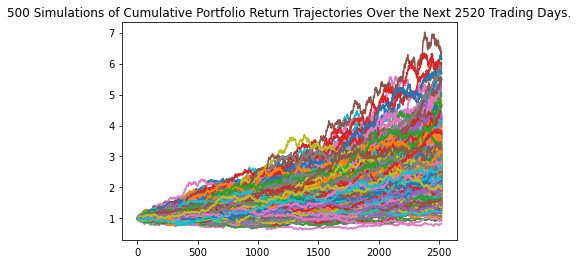

In [39]:
# Plot simulation outcomes

line_plot_ten = MC_even_ten.plot_simulation()

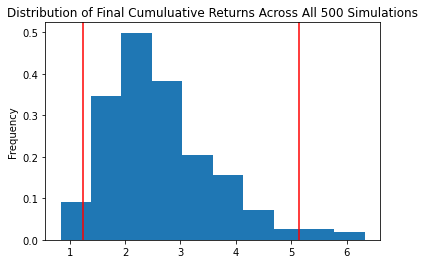

In [40]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_ten.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              2.637334
std               0.971720
min               0.835438
25%               1.946570
50%               2.459831
75%               3.153406
max               6.326504
95% CI Lower      1.246852
95% CI Upper      5.142177
Name: 2520, dtype: float64


In [42]:
# Set initial investment
initial_investment_ten = 70000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*70000,2)
ci_upper_ten = round(even_tbl_ten[9]*70000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $87279.65 and $359952.42
